# Arshaq signals

In [ ]:
red folder news strategy

steps - 
1 - 
DETERMINE DAILY BIAS 
- go to daily candle 
- get trend 
- point out trend low or high
- point out fair value gaps
- point out liq pools
- get previous session lows and highs
- determine if asia highs and lows are taken out in London session

ON RED FOLDER NEWS DAY do this on 15 mins chart  
- mark out liq pools from previous sessions
- wait for huge candle to form (green or red)
- wait till new York session
- confirm if price was in the liq pool range as identified earlier (this initiates sell side liq pool move bias)
- mark out following fair value gaps occurring just outside of liq pool hit
- wait for FVGs to be filled
- prompt after 3 candles of fill (depending on candle timeframe) ONLY DURING NEW YORK SESSION

EXIT (not to be implemented currently
- target based approach
- targets 1 : liq pools marked out from prev sessions
- 


qns - 


indicators - 
make fair value gap indicator
make liq pool indicator





In [1]:
# import os

# # Change directory to your desired root (absolute or relative)
# os.chdir('D:\AlphaStrat')

# # Confirm the change
# print("Current Working Directory:", os.getcwd())

# import sys
# sys.path.append('./Python Backtesting/Python_helper')

In [2]:
# !pip install python-telegram-bot==13.15

# !pip uninstall python-telegram-bot -y
# !pip uninstall telegram -y

In [4]:
#library to handle data
import pandas as pd
#library to manipulate time values
import time
import datetime
#library to plot data
import mplfinance as mpf 
#library to check status of website
from requests_html import HTMLSession
import matplotlib.pyplot as plt

In [40]:
# Required Libraries
import requests

BOT_TOKEN = '8093154876:AAG-GRXRoF8FEegc_jN7r7taPgVtiRmWwlo' # see config
CHAT_ID = 7601882742  # see config
TELEGRAM_API_URL = f'https://api.telegram.org/bot{BOT_TOKEN}/sendMessage'

def send_message(chat_id: int, message: str) -> dict:
    """
    Sends a message to a specific Telegram chat ID.

    Args:
        chat_id (int): The Telegram user or chat ID.
        message (str): The message text to send.

    Returns:
        dict: Telegram API response.
    """
    payload = {
        'chat_id': chat_id,
        'text': message
    }
    try:
        response = requests.post(TELEGRAM_API_URL, data=payload, timeout=10)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as error:
        return {"ok": False, "error": str(error)}

# Example Usage - Run this in your Jupyter cell
response = send_message(CHAT_ID, "Hello from Jupyter Notebook Bot! ðŸ¤–âœ…")
print(response)


{'ok': True, 'result': {'message_id': 64, 'from': {'id': 8093154876, 'is_bot': True, 'first_name': 'Alphastrat', 'username': 'Alphastrat_bot'}, 'chat': {'id': 7601882742, 'first_name': 'Surendra', 'type': 'private'}, 'date': 1742908318, 'text': 'Hello from Jupyter Notebook Bot! ðŸ¤–âœ…'}}


## Function for implementing Strategy
Takes the loaded/web scraped dataframe and analyses it to make buy/sell decisions.

In [7]:
def strategy(df):
    df['time'] = pd.to_datetime(df['time'])
    df['date'] = df['time'].dt.date
    df['hour'] = df['time'].dt.hour
    df['minute'] = df['time'].dt.minute
    df.rename(columns={'Volume': 'volume'}, inplace=True)

    min_max_ranges = []

    # Iterate over unique dates
    for date in df['date'].unique():
        # Filter data for 2 AM to 9:30 AM
        day_data = df[(df['date'] == date) & ((df['hour'] >= 2)) & ((df['hour'] < 9) | ((df['hour'] == 9) & (df['minute'] <= 30)))]
#         print(day_data)
        
        if not day_data.empty:
            day_high = day_data['high'].max()
            day_low = day_data['low'].min()
            range_50 = day_low + (day_high - day_low) * 0.5
            
            min_max_ranges.append({
                'date': date,
                'day_high': day_high,
                'day_low': day_low,
                'range_50': range_50
            })

    range_df = pd.DataFrame(min_max_ranges)
    print(range_df)

    # Mark points that reach 50% of range between 9:30 AM and 4:30 PM
    df['Marker'] = None
    df['Color'] = 'c'
    color = False

    for _, row in range_df.iterrows():
        date = row['date']
        range_50 = row['range_50']
        
        # Get data for 9:30 AM to 4:30 PM
        after_open = df[(df['date'] == date) & ((df['hour'] > 9) | ((df['hour'] == 9) & (df['minute'] > 30))) & (df['hour'] < 16)]
    
       
        for index, row in after_open.iterrows():
            if (row['high'] >= range_50 and row['low'] <= range_50 and color == False):
                df.at[index, 'Marker'] = '^'
                df.at[index, 'Color'] = 'g'
                color = True
            elif (row['high'] >= range_50 and row['low'] <= range_50 and color == True):
                df.at[index, 'Marker'] = '^'
                df.at[index, 'Color'] = 'r'
                color = False
                
    
    
    return df

In [8]:
import os

# List all files and directories in the current directory
print(os.listdir('.'))


['.ipynb_checkpoints', 'Arshaq Trading Signals.ipynb', 'CME_MINI_DL_ES1!, 1-DESKTOP-FLUMNLE.csv', 'CME_MINI_DL_ES1!, 1.csv', 'data', 'SHAQ_GENERATED_SIGNALS - Copy.csv', 'SHAQ_GENERATED_SIGNALS.csv', 'test.csv', 'TSLA_GENERATED_SIGNALS.csv']


In [9]:
signals = strategy(pd.read_csv("CME_MINI_DL_ES1!, 1.csv"))
signals.to_csv("SHAQ_GENERATED_SIGNALS.csv", index=False)

         date  day_high  day_low  range_50
0  2025-03-05   5844.25  5783.75  5814.000
1  2025-03-06   5850.00  5769.25  5809.625
2  2025-03-07   5786.00  5735.00  5760.500
3  2025-03-10   5754.00  5687.25  5720.625
4  2025-03-11   5651.75  5606.75  5629.250
5  2025-03-12   5675.00  5577.50  5626.250
6  2025-03-13   5609.75  5559.25  5584.500
7  2025-03-14   5588.00  5552.75  5570.375


## Plotting and Profit/Loss Calculation Function
Helper function to be used in plotting and PnL calculation. The PnL is calculated only with completed orders i.e when a stock has been bought AND sold. If a stock has only been bought, it will not be counted in the PnL calculation.

In [7]:
def pnl_plot_data(ticker):
#     file_path = 'SHAQ_GENERATED_SIGNALS.csv'
#     data = pd.read_csv(file_path)
    data = strategy(pd.read_csv("CME_MINI_DL_ES1!, 1.csv"))
    data['time'] = pd.to_datetime(data['time'])  
    data.set_index('time', inplace=True)  # Set time as index
    
    # Iterate over each unique date to plot individually
    unique_dates = data["date"].unique()
    
    for date in unique_dates:
        # Filter data for 2 AM - 4 PM
        daily_data = data[(data.index.date == date) & (data['hour'] >= 2) & (data['hour'] <= 16)]

        if daily_data.empty:
            continue  # Skip if no data for this date

        # Create additional plots for buy/sell markers if available
        if 'Marker' in daily_data.columns and 'Color' in daily_data.columns:
            ap = mpf.make_addplot(0.95 * daily_data['low'], 
                                  type='scatter', 
                                  marker=daily_data['Marker'].tolist(), 
                                  markersize=90, 
                                  color=daily_data['Color'].tolist())
        else:
            ap = None

        # Plot data
        mpf.plot(daily_data, 
                 type='candle', 
                 style='yahoo', 
                 mav=(10, 20), 
                 volume=True, 
                 addplot=ap, 
                 title=f"Trading Data for {date}")

        plt.show() 
        
#     #PnL calculation and output
#     orderlist = data[data['Buy Price'].notnull()].index.tolist()
#     total_buy = data['Buy Price'].loc[orderlist[0:data['Sell Price'].count()]].sum()
#     total_sale = data['Sell Price'].sum()
#     print('Total Profit/loss made using this strategy: ', round((total_sale - total_buy)/total_buy * 100,1), '%')

         date  day_high  day_low  range_50
0  2025-03-05   5844.25  5783.75  5814.000
1  2025-03-06   5850.00  5769.25  5809.625
2  2025-03-07   5786.00  5735.00  5760.500
3  2025-03-10   5754.00  5687.25  5720.625
4  2025-03-11   5651.75  5606.75  5629.250
5  2025-03-12   5675.00  5577.50  5626.250
6  2025-03-13   5609.75  5559.25  5584.500
7  2025-03-14   5588.00  5552.75  5570.375


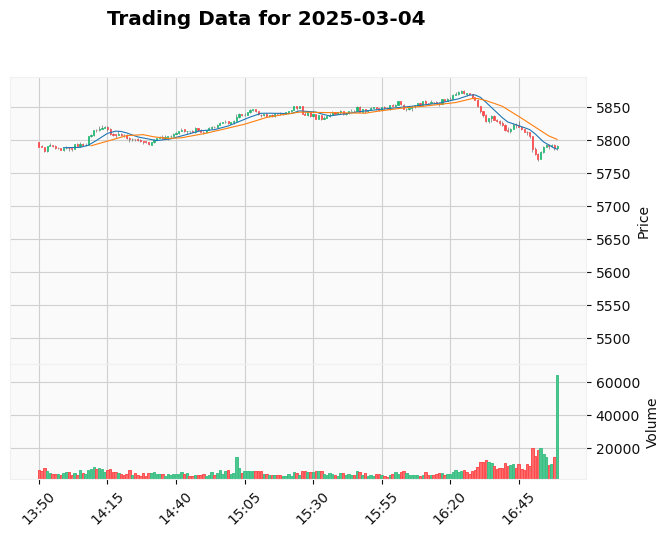

C:\Users\Admin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


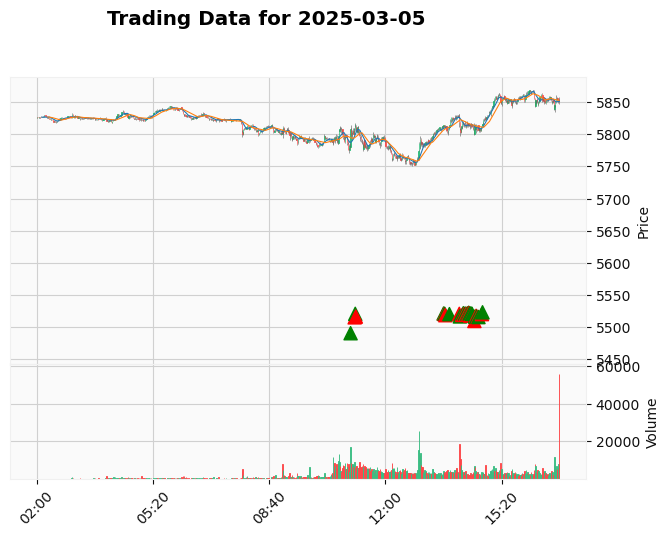

C:\Users\Admin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


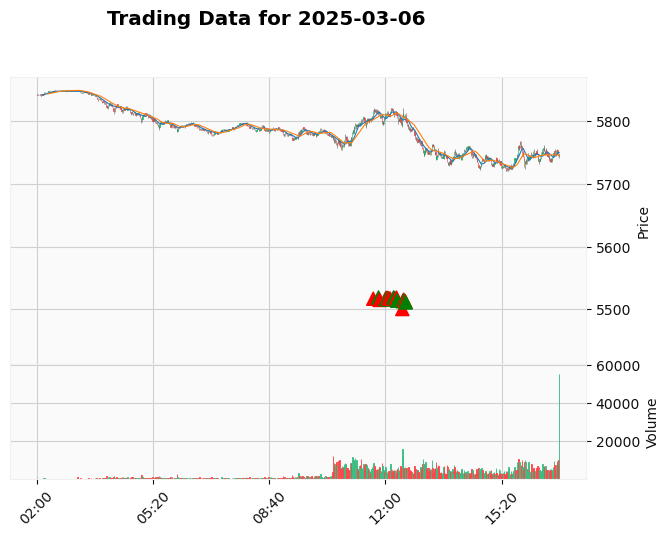

C:\Users\Admin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


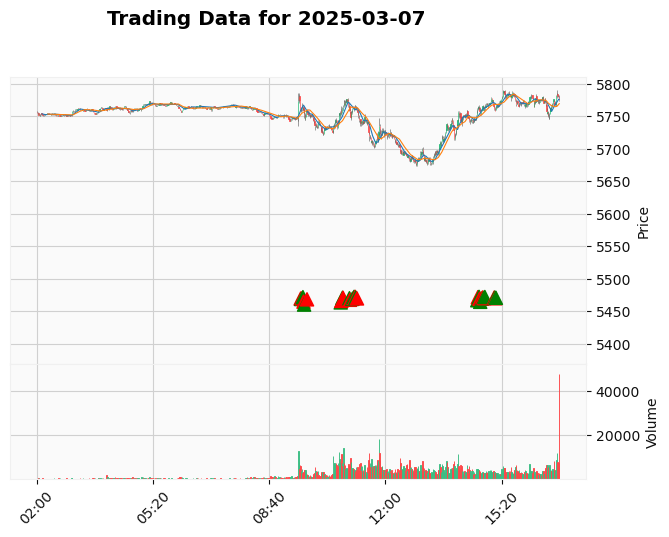

C:\Users\Admin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


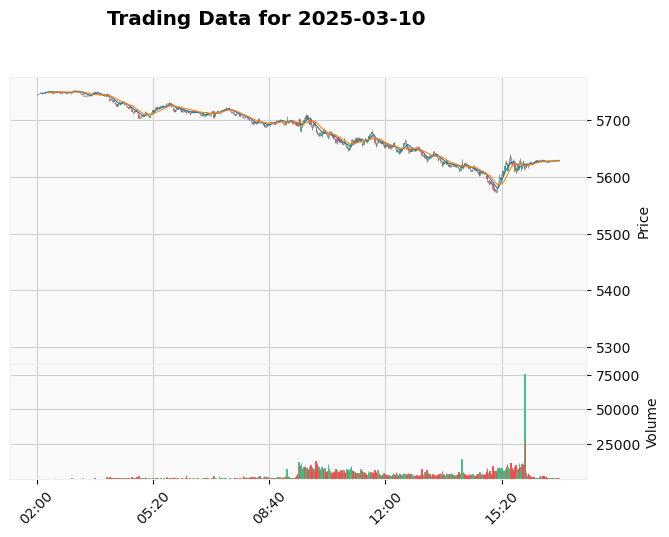

C:\Users\Admin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


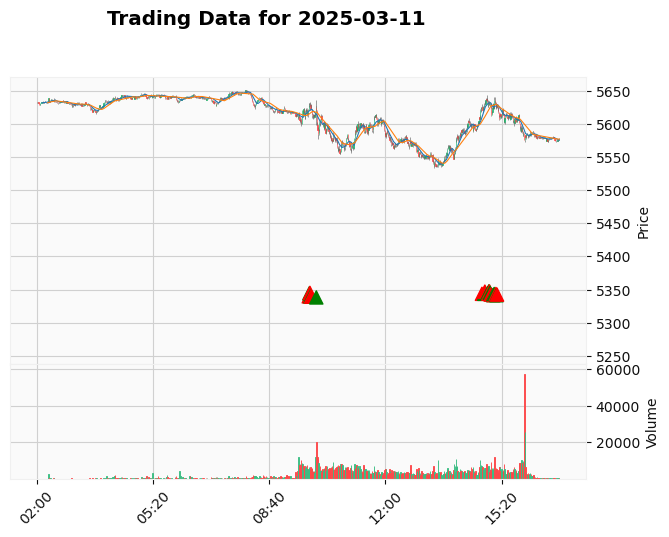

C:\Users\Admin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


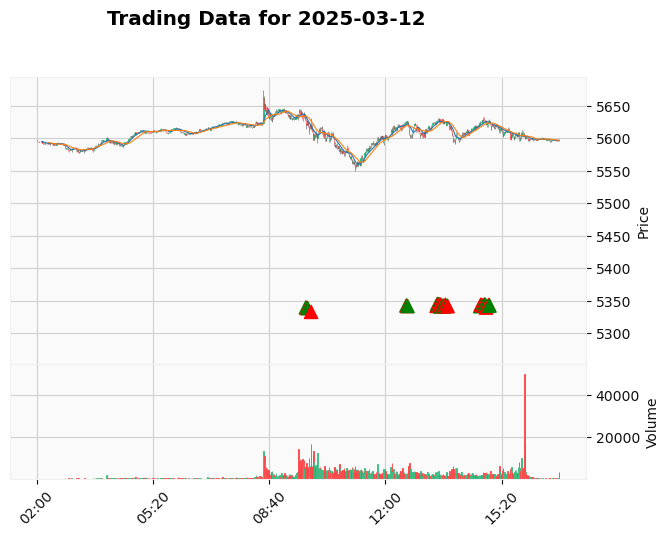

C:\Users\Admin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


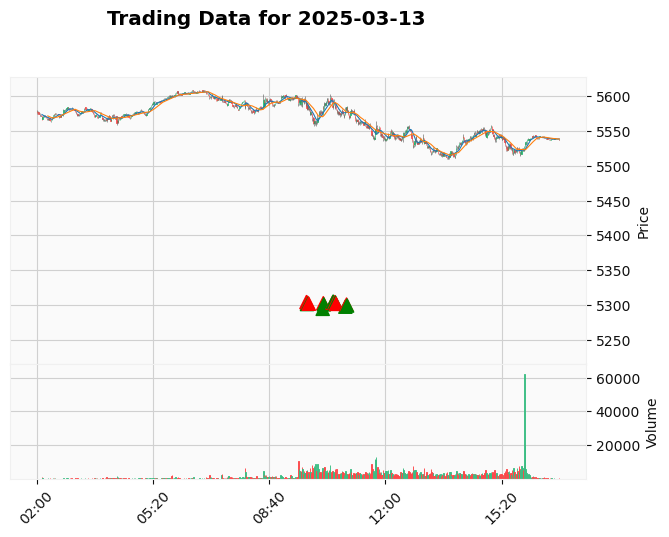

C:\Users\Admin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


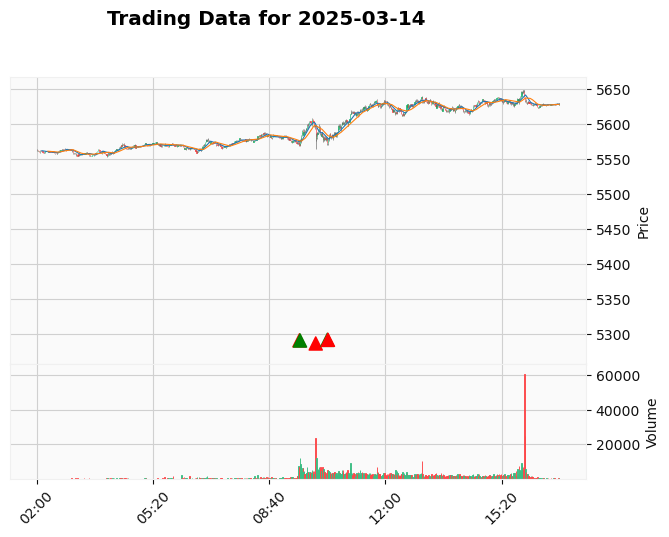

In [8]:
pnl_plot_data('AMZN')

## Case study - Amazon.com, Inc. (AMZN)

In [ ]:
pnl_plot_data('AMZN')

#### Analysis
In this case, if the strategy was a little more responsive to the changes in price, it could have taken more advantage of the price increase that occured from the first buy point. The price had a lot of time to drop before a crossunder occured. The responsiveness of a moving average is propotional to the number of days the average is taken of. So for this scenario, a 5 day moving average against a 20 moving average may have yielded better profits. 

## Case study - Microsoft Corporation (MSFT)

In [ ]:
pnl_plot_data('MSFT')

#### Analysis
This case is similar to the Amazon chart, although the return on this chart is quite decent and the moving average period choice was good.

## Case study - S&P 500 (^GSPC)

In [ ]:
pnl_plot_data('^GSPC')

#### Analysis
In this scenario, the prices in the chart were initially moving sideways, with an incline that span almost 2 months. This strategy suffers from low yields in this scenario as the moving averages produces false signals, causing the system to make a buy order and follows with a sharp decline in the price movement. A profit was seen due to the incline that the chart displayed after the sideways movement.  

## Case study - Tesla, Inc. (TSLA)

In [ ]:
pnl_plot_data('TSLA')

#### Analysis
This scenario would be an example of a down trending stock. The prices are seen to be steadily reducing with a few blips of price increases here and there. This strategy is seen to produce very poor results in terms of returns. To yield a positive return in a down-trending chart is very difficult even for a professional making buy/sell decisions. The software ends up making buy decisions somewhere a professional wouldn't because of those small blips. The hardcoded strategy does not recognise the overall shape of the price-movement. Therefore, it is fooled into making purchases that end in a loss.

## Conclusion
This method of executing successful trades is highly dependant on the type of graph/price-movements displayed on the chart, as observed from the five case studies. This strategy alone will not be able to promise big returns on every stock it has been implemented on. To come up with a success rate figure, a much larger sample size must be tested. At the start of this assignment I had stated that the choice of company stock data is completely random, however this would still cause skewed results to be produced. The strategy is very dependent on the type of industry the company is from, as it has a major role in the shape of the chart. so any sample size that has a higher number of industries that produce a positive price-moving chart will produce skewed/biased results. Therefore a sample size must only contain a certain type of industry.

More refinement and addition of more criteria would help this(as seen in the case studies), but as more criteria is hard coded into a system, the changing market environment and conditions may cause the strategies to become obselete, requiring a lot of work to keep them updated. This is where machine learning would come in. With a good machine learning algorithm, it can rewrite itself and learn the slightest observations that triggered a price increase in the market. It would be able to come up with a finely tailored strategy taken from learning historical data of stocks in different industries and produce promising results.

As for this code here, it can be used as a helping hand where the code is implemented to stocks deemed up-trending or promising by proffessionals to help streamline returns and the time spent on observing the market.